In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

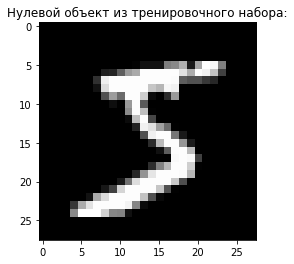

In [3]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

In [4]:
dim = 784 # 28*28
X_train = X_train.reshape(len(X_train), dim)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=44, svd_solver='full')
modelPCA = pca.fit(X_train)
print(np.cumsum(pca.explained_variance_ratio_))
X_train = modelPCA.transform(X_train)

[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=45)

In [8]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [9]:
svm = SVC(probability=True)
clf = svm.fit(X_train, y_train)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
SVC_M = confusion_matrix(y_test, y_pred)
SVC_M

array([[1163,    0,    0,    0,    1,    0,    2,    0,    2,    2],
       [   0, 1348,    4,    0,    1,    0,    0,    2,    1,    1],
       [   1,    0, 1184,    1,    3,    0,    0,    5,    1,    2],
       [   0,    0,   11, 1148,    0,   12,    0,    1,    8,    4],
       [   1,    2,    2,    1, 1113,    0,    3,    1,    2,   11],
       [   1,    1,    2,    6,    4, 1020,    6,    0,    6,    1],
       [   0,    0,    0,    0,    3,    5, 1160,    0,    2,    0],
       [   1,    3,    7,    0,    4,    0,    0, 1264,    1,    9],
       [   1,    6,    2,    2,    1,    4,    3,    0, 1213,    2],
       [   3,    1,    0,    5,   17,    2,    0,    7,    3, 1178]],
      dtype=int64)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
clf = rfc.fit(X_train, y_train)
y_pred = clf.predict(X_test)

RFC_M = confusion_matrix(y_test, y_pred)
RFC_M

array([[1147,    0,    2,    4,    2,    4,    7,    0,    2,    2],
       [   0, 1332,   11,    3,    1,    3,    3,    1,    2,    1],
       [   4,    0, 1142,   15,   10,    1,    2,    6,   14,    3],
       [   3,    1,   12, 1098,    1,   21,    3,    7,   28,   10],
       [   3,    4,    3,    5, 1068,    0,    6,    2,    7,   38],
       [   3,    1,    5,   19,   13,  979,   13,    1,   10,    3],
       [   4,    1,    4,    0,    5,   16, 1136,    0,    4,    0],
       [   1,    7,   14,    1,   14,    3,    1, 1224,    3,   21],
       [   3,   10,   10,   25,    9,   21,    4,    1, 1140,   11],
       [   3,    2,    6,   21,   32,    7,    1,   19,    7, 1118]],
      dtype=int64)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
clf = dtc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
DTC_M = confusion_matrix(y_test, y_pred)
DTC_M

array([[1049,    0,   17,   11,    5,   25,   29,    3,   21,   10],
       [   1, 1296,   11,    4,    4,    9,   13,    9,    8,    2],
       [  19,   13,  979,   25,   20,   26,   19,   30,   50,   16],
       [  12,    6,   39,  937,    4,   69,   13,   15,   70,   19],
       [  10,    7,   18,   11,  905,   19,   20,   32,   25,   89],
       [  29,    8,   21,   68,   15,  791,   26,   17,   51,   21],
       [  23,    4,   16,    6,   22,   21, 1057,    2,   13,    6],
       [   3,    8,   22,   27,   20,   14,    6, 1100,   18,   71],
       [  18,   13,   55,   65,   18,   69,   10,   18,  940,   28],
       [   8,    4,   13,   24,   97,   35,    3,   66,   27,  939]],
      dtype=int64)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_pred = clf.predict(X_test)
LR_M = confusion_matrix(y_test, y_pred)
LR_M

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1129,    1,    1,    0,    2,   15,    8,    1,    9,    4],
       [   0, 1313,    5,    8,    0,    8,    1,    3,   18,    1],
       [   6,   15, 1046,   20,   29,    5,   25,   10,   35,    6],
       [   4,   10,   23, 1007,    1,   56,    8,   16,   41,   18],
       [   4,    9,    7,    4, 1037,    3,   10,    1,   13,   48],
       [   8,   10,   12,   44,   12,  866,   28,    9,   35,   23],
       [   9,    3,   10,    0,   15,   26, 1094,    3,   10,    0],
       [   1,   11,   17,    3,   15,    3,    0, 1188,    5,   46],
       [  10,   39,   11,   39,    2,   41,   11,    6, 1063,   12],
       [   6,    9,    8,   22,   48,   10,    1,   43,    8, 1061]],
      dtype=int64)

In [15]:
clf = neigh.fit(X_train, y_train)
y_pred = clf.predict(X_test)
KNN_M = confusion_matrix(y_test, y_pred)
KNN_M

array([[1165,    0,    1,    1,    0,    0,    2,    0,    0,    1],
       [   0, 1349,    3,    0,    1,    1,    0,    1,    1,    1],
       [   3,    2, 1172,    1,    1,    0,    1,    9,    6,    2],
       [   0,    1,   14, 1131,    0,   15,    0,    2,   16,    5],
       [   2,    4,    1,    0, 1106,    0,    2,    3,    1,   17],
       [   1,    0,    0,   11,    1, 1010,   14,    0,    1,    9],
       [   4,    0,    1,    0,    1,    4, 1158,    0,    2,    0],
       [   0,    6,    5,    0,    0,    0,    0, 1262,    2,   14],
       [   3,    6,    2,   12,    3,    7,    3,    0, 1191,    7],
       [   3,    1,    1,    4,   18,    0,    0,   16,    3, 1170]],
      dtype=int64)

In [16]:
SVC_M - KNN_M

array([[ -2,   0,  -1,  -1,   1,   0,   0,   0,   2,   1],
       [  0,  -1,   1,   0,   0,  -1,   0,   1,   0,   0],
       [ -2,  -2,  12,   0,   2,   0,  -1,  -4,  -5,   0],
       [  0,  -1,  -3,  17,   0,  -3,   0,  -1,  -8,  -1],
       [ -1,  -2,   1,   1,   7,   0,   1,  -2,   1,  -6],
       [  0,   1,   2,  -5,   3,  10,  -8,   0,   5,  -8],
       [ -4,   0,  -1,   0,   2,   1,   2,   0,   0,   0],
       [  1,  -3,   2,   0,   4,   0,   0,   2,  -1,  -5],
       [ -2,   0,   0, -10,  -2,  -3,   0,   0,  22,  -5],
       [  0,   0,  -1,   1,  -1,   2,   0,  -9,   0,   8]], dtype=int64)

In [19]:
for i in range(10):
    print("точность " + str(i) + " \t SVM = %.5f" % (SVC_M[i][i] / np.sum(SVC_M[i]))," \t KNN = %.5f" % (KNN_M[i][i] / np.sum(KNN_M[i])), " \t RFC = %.5f" % (RFC_M[i][i] / np.sum(RFC_M[i])), " \t DTC = %.5f" % (DTC_M[i][i] / np.sum(DTC_M[i]))," \t LR = %.5f" % (LR_M[i][i] / np.sum(LR_M[i])))

точность 0 	 SVM = 0.99402  	 KNN = 0.99573  	 RFC = 0.98034  	 DTC = 0.89658  	 LR = 0.96496
точность 1 	 SVM = 0.99337  	 KNN = 0.99410  	 RFC = 0.98158  	 DTC = 0.95505  	 LR = 0.96758
точность 2 	 SVM = 0.98914  	 KNN = 0.97911  	 RFC = 0.95405  	 DTC = 0.81788  	 LR = 0.87385
точность 3 	 SVM = 0.96959  	 KNN = 0.95524  	 RFC = 0.92736  	 DTC = 0.79139  	 LR = 0.85051
точность 4 	 SVM = 0.97975  	 KNN = 0.97359  	 RFC = 0.94014  	 DTC = 0.79665  	 LR = 0.91285
точность 5 	 SVM = 0.97421  	 KNN = 0.96466  	 RFC = 0.93505  	 DTC = 0.75549  	 LR = 0.82713
точность 6 	 SVM = 0.99145  	 KNN = 0.98974  	 RFC = 0.97094  	 DTC = 0.90342  	 LR = 0.93504
точность 7 	 SVM = 0.98061  	 KNN = 0.97905  	 RFC = 0.94957  	 DTC = 0.85337  	 LR = 0.92164
точность 8 	 SVM = 0.98298  	 KNN = 0.96515  	 RFC = 0.92382  	 DTC = 0.76175  	 LR = 0.86143
точность 9 	 SVM = 0.96875  	 KNN = 0.96217  	 RFC = 0.91941  	 DTC = 0.77220  	 LR = 0.87253
